## Q5: Differentiate a function
---

We compute the derivative of the function $ f(x) = log(sin(x)) + x^2 cos(x) $ using 
 - dual numbers
 - the analytical derivative
 - numerically, with decreasing step size

and compare the results.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import dual_autodiff as df

First, I compute the derivative of the function using dual numbers.

In [6]:
x=df.Dual(1.5,1)

output = (x.sin()).log() + (x**2) * x.cos()
grad_dual=output.dual
print(grad_dual)

-1.9612372705533612


Second, I compute the analytical derivative of the function.

In [7]:
def f_grad(x):
    res= 1/np.tan(x) + 2*x*np.cos(x) - x**2 * np.sin(x)
    return res

grad_anal=f_grad(1.5)
print(grad_anal)

-1.9612372705533612


 This result agrees with the gradient obtained using dual numbers at the machine precision level (up to 1e-16)! This shows that the dual number method is very accurate, which is a highly useful tool for automatic differentiation.

Thirdly, for comparison, I compute the numerical derivative of the function using a decreasing step size. I habe also plotted the results and included the dual/analytical derivative for comparison.

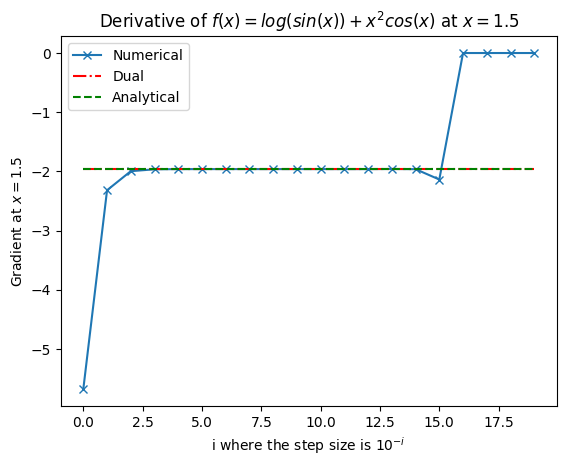

In [8]:
# define the function f
def f(x):
    y = np.log(np.sin(x)) + x**2 *np.cos(x)
    return y
    
x=1.5  

grad_num=[]
for i in range(20):
    eps=10**(-i)
    y = (f(x+eps) - f(x))/eps
    grad_num.append(y)

step_size=[i for i in range(20)]
plt.plot(step_size, grad_num, marker='x', label="Numerical")
plt.xlabel("i where the step size is $10^{-i}$")
plt.ylabel("Gradient at $x=1.5$")
plt.title("Derivative of $ f(x) = log(sin(x)) + x^2 cos(x) $ at $x=1.5$")
plt.hlines(grad_dual, xmin=0, xmax=19, color='r', ls="-.", label= "Dual")
plt.hlines(grad_anal, xmin=0, xmax=19, color='g', ls="--", label= "Analytical")
plt.legend()
plt.show()
